# 02. Neural Netowrk classification with PyTOrch

Classification is a problem of predicting whether something is one thing or another (there can be multiple classes)

**What we're going to cover**

* Architecture of a neural network classification model
* Input shapes and output shapes of a classinication mpdel (Teatures and labels)
* Creating custom data to view, fit on and predict on
* Steps in moddeling
    * model Steps in modelling . Creating a model, setting a loss function and optimiser, creating a training loop, evaluating a model
* Saving and loading models*
* Harnessing the power of non-linearity
* Different clansification evaluation methods

## 1. Make Classification data and get ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 samples

n_samples = 1000

#Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)


In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:,1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


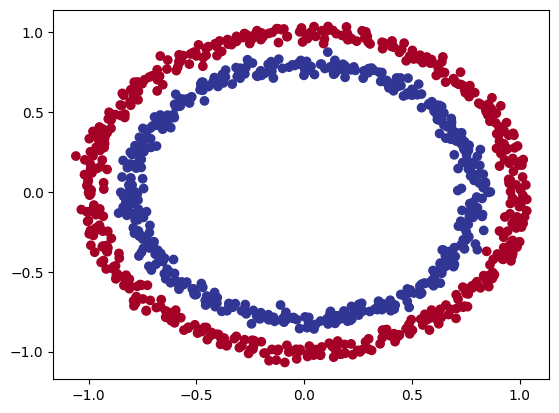

In [ ]:
# Visualize, Visualize, Visualize
import matplotlib.pyplot as plt

plt.scatter(x= X[:, 0], y= X[:, 1], c = y, cmap = plt.cm.RdYlBu)

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

## 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features adn labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


## 1.2 Turn data into tensors


In [ ]:
import torch
torch.__version__

'2.4.1+cu121'

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by suybclassing `nn.Module`)
3. Create a training and test loop

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

#Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Now we've setup device agnostic code, let's build a model that:

1. Subclass `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines `forward` method to specify the forward pass (or forward computation) of the model
4. Instatiate an instance of our model calss and send it to the target device

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5) # The out features of the First Layer # Out features are upscaling it to 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # Must match the in features of the Second layer

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) #x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instacnce of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
#Alternate model
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.two_linear_layers = nn.Sequential(nn.Linear(in_features = 2, out_features = 5),
                        nn.Linear(in_features = 5, out_features = 1))

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.two_linear_layers(x)  #x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instacnce of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(nn.Linear(in_features = 2, out_features = 5),
                        nn.Linear(in_features = 5, out_features = 1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cpu'

In [ ]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.2976,  0.6313],
        [ 0.4087, -0.3091],
        [ 0.4082,  0.1265],
        [ 0.3591, -0.4310],
        [-0.7000, -0.2732]], requires_grad=True)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732]])),
             ('0.bias', tensor([-0.5424,  0.5802,  0.2037,  0.2929,  0.2236])),
             ('1.weight',
              tensor([[-0.0078,  0.3500, -0.3178,  0.0282, -0.3052]])),
             ('1.bias', tensor([0.1379]))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n {y_test[:10]}")

Lenght of predictions: 200, Shape: torch.Size([200, 1])
Lenght of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.0763],
        [0.1453],
        [0.0813],
        [0.0742],
        [0.3760],
        [0.4158],
        [0.3764],
        [0.4404],
        [0.0688],
        [0.1532]])

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again.... this is problem specific.

For example for regression you might want MAE (Mean Absolute Error) or MSE (Mean Squared Error)

For classification you might want binary cross entropy or categorical corss entropy (cross entropy)

As a reminder, the loss function measures how *wrong* your model's predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`

* For definition what Logit is - https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow

* For the optimizer we're going to use `torch.optim`

In [ ]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss()  # <- This contains the Sigmoid layer combined with BCELoss
                                  # This is more numerically stable than sequential Sigmoid and BCE

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)


In [ ]:
# Calculate accuracy - out of 100 examples, what percantage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100

  return acc

## 3. Train Model

To Train our model, we're going to need to build a training loop with the following steps:

1. Forward Pass
2. Calculate the loss
3. Optimizer Zero Grad
4. Loss Backward (backpropagation)
5. Optimizer Step (Gradient descent)

## 3.1 Going from raw logits -> Prediction Probabilities -> Prediction Labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid probabilities for binary and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction lables** by eithe rounding them or taking `argmax()`

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.0763],
        [0.1453],
        [0.0813],
        [0.0742],
        [0.3760]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function for out model logits to turn them into prediction probabilities
y_pred_probs= torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5191],
        [0.5363],
        [0.5203],
        [0.5185],
        [0.5929]])

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5. `y=1` (class 1)
* `y_pred_probs` < 0.5. `y=0` (class 0)


In [ ]:
#Find the prediction labels
y_pred = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

# Check for equality
print(torch.eq(y_pred.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_pred.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epoches
epochs = 100

# Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building the training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probs -> pred label

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train) #nn.BCEwithLogitLoss() excepts raw logits as input #Without logits it would expect Predcition Probablitiy as a input
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # 3. Optimizer Zero Grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagration)
  loss.backward()

  # 5. Optimizer Step
  optimizer.step()


  ###Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70234, Accuracy: 57.38% | Test Loss: 0.70194, Test Accuracy: 57.00%
Epoch: 10 | Loss: 0.69697, Accuracy: 52.75% | Test Loss: 0.69803, Test Accuracy: 54.00%
Epoch: 20 | Loss: 0.69505, Accuracy: 51.62% | Test Loss: 0.69667, Test Accuracy: 51.00%
Epoch: 30 | Loss: 0.69427, Accuracy: 51.12% | Test Loss: 0.69607, Test Accuracy: 51.00%
Epoch: 40 | Loss: 0.69390, Accuracy: 50.38% | Test Loss: 0.69573, Test Accuracy: 49.50%
Epoch: 50 | Loss: 0.69367, Accuracy: 50.50% | Test Loss: 0.69547, Test Accuracy: 49.00%
Epoch: 60 | Loss: 0.69352, Accuracy: 50.38% | Test Loss: 0.69526, Test Accuracy: 49.00%
Epoch: 70 | Loss: 0.69341, Accuracy: 50.50% | Test Loss: 0.69509, Test Accuracy: 49.00%
Epoch: 80 | Loss: 0.69333, Accuracy: 50.38% | Test Loss: 0.69495, Test Accuracy: 49.00%
Epoch: 90 | Loss: 0.69326, Accuracy: 50.25% | Test Loss: 0.69483, Test Accuracy: 48.50%


## 4. Make prediction and evaluate the model

From the metrics it looks like out model is not learning anythin....

So to inspect it let's make some visuals

In other words, "Visualize! Visualize! Visualize!"

To do so, we're going to import a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


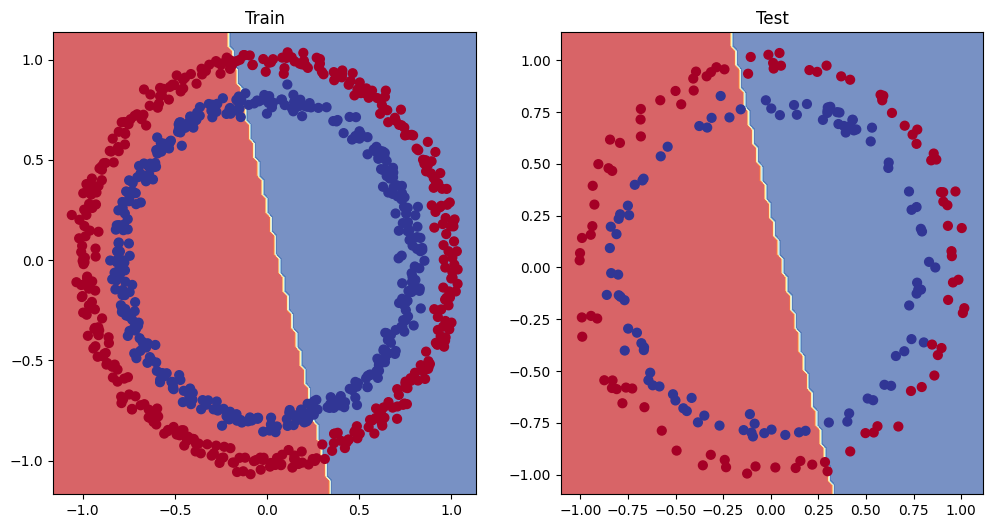

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train,y_train)


plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test,y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units.
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function
* Change the optimizer

This options are all from a model's perspective because they deal directly with the model rather than Data

And because these options are all values we (as ML Engineers and Data Scienctist) can change, they are reffered as **Hyperparameters**


Let's try to improve our model by:
* Adding more hidden units: 5->10
* increase the number of layers: 2->3
* increase the number of epoches: 100->1000

In [ ]:
class CirclModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features =1)

  def forward(self,x):
    z = self.layer_3(self.layer_2(self.layer_1(x)))
    return z

model_1 = CirclModelV1().to(device)
model_1

CirclModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [ ]:
#Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Train for longer
epoches = 1000

# Put the data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epoches):
  ###Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> pred probabilities -> prediction


  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ###Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test Loss: 0.69261, Test Accuracy: 51.00%
Epoch: 100 | Loss: 0.69369, Accuracy: 50.25% | Test Loss: 0.69269, Test Accuracy: 50.00%
Epoch: 200 | Loss: 0.69351, Accuracy: 50.12% | Test Loss: 0.69282, Test Accuracy: 49.50%
Epoch: 300 | Loss: 0.69339, Accuracy: 50.50% | Test Loss: 0.69295, Test Accuracy: 49.00%
Epoch: 400 | Loss: 0.69329, Accuracy: 50.38% | Test Loss: 0.69309, Test Accuracy: 48.50%
Epoch: 500 | Loss: 0.69322, Accuracy: 49.88% | Test Loss: 0.69322, Test Accuracy: 49.50%
Epoch: 600 | Loss: 0.69317, Accuracy: 49.50% | Test Loss: 0.69335, Test Accuracy: 53.00%
Epoch: 700 | Loss: 0.69313, Accuracy: 49.38% | Test Loss: 0.69347, Test Accuracy: 50.50%
Epoch: 800 | Loss: 0.69309, Accuracy: 50.00% | Test Loss: 0.69358, Test Accuracy: 51.00%
Epoch: 900 | Loss: 0.69307, Accuracy: 50.62% | Test Loss: 0.69368, Test Accuracy: 47.50%


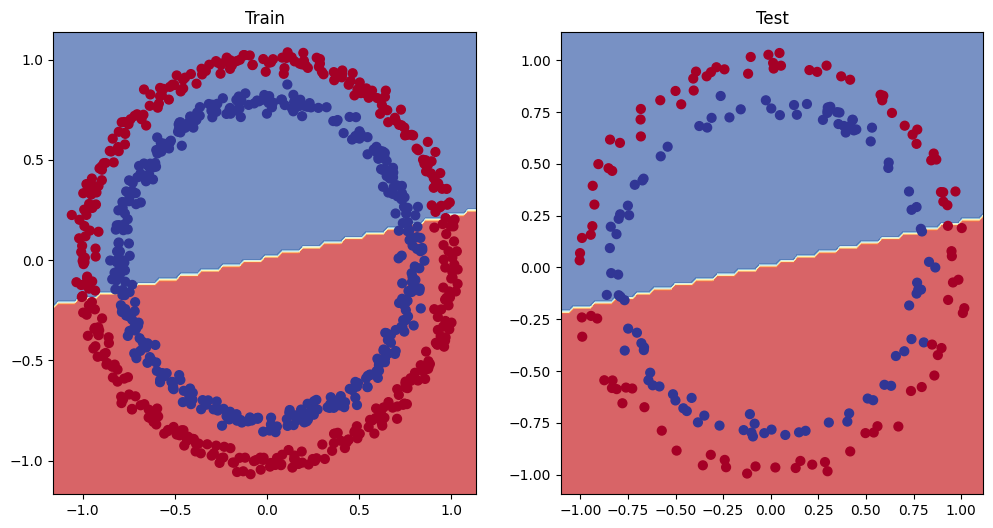

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train,y_train)


plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test,y_test)

## 5.1 Preparing data to see if our model can model a straight line

Let's create some linear data to see if our model's able to model it and we're not just using a model that can't learn anything.

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


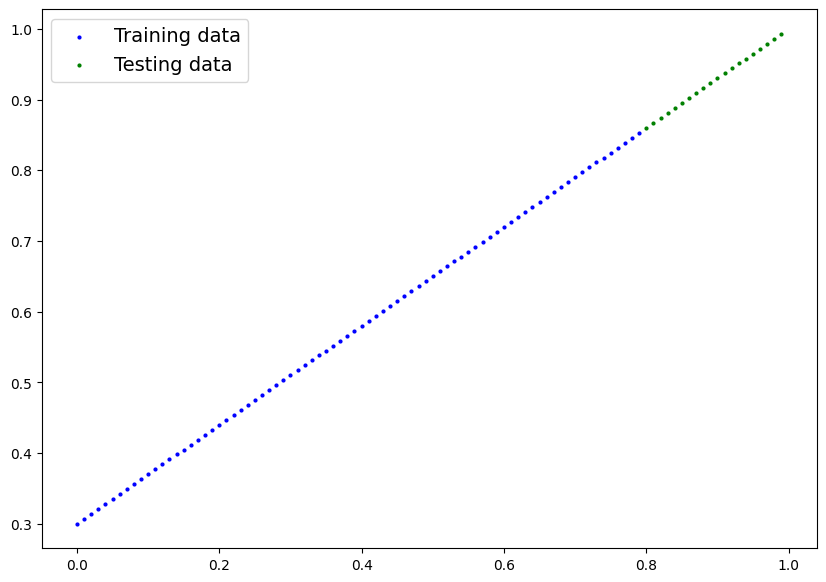

In [ ]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);



## 5.2 Adjusting `model_1` to fit a straight line
Now we've got some data, let's recreate `model_1` but with a loss function suited to our regression data.

In [ ]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


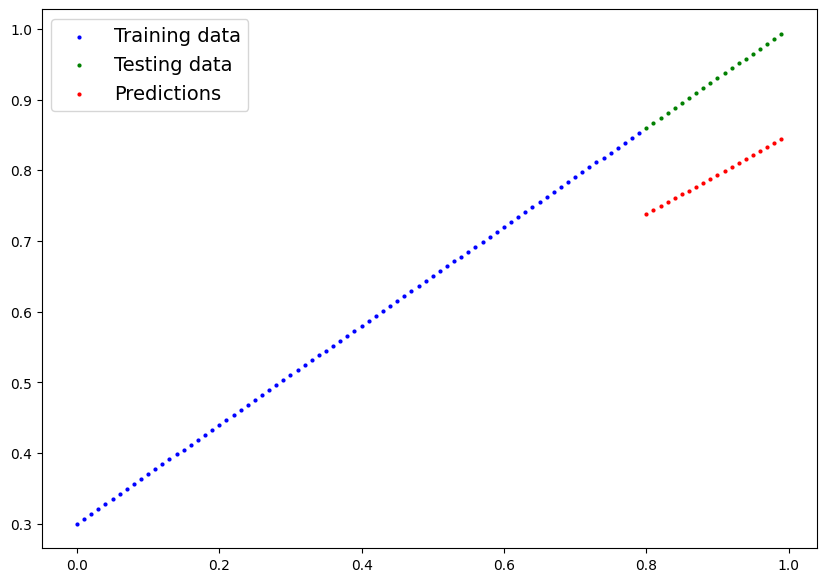

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());


## 6. The missing piece: non-linearity
We've seen our model can draw straight (linear) lines, thanks to its linear layers.

But how about we give it the capacity to draw non-straight (non-linear) lines?

How?

Let's find out.


##6.1 Recreating non-linear data (red and blue circles)

First, let's recreate the data to start off fresh. We'll use the same setup as before.

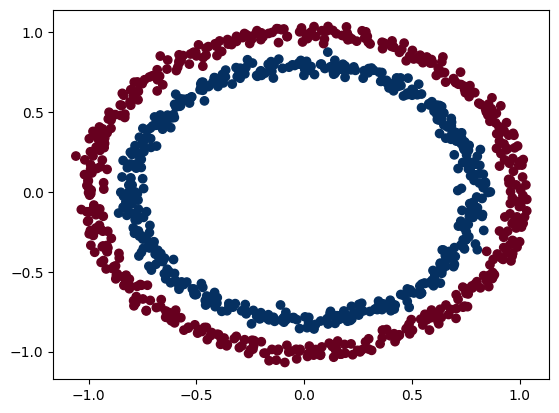

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [ ]:

# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))


## 6.2 Building a model with non-linearity

* Linear = Straight Linear
* Non-Linear = non-straight lines

So far our neural networks have only been using linear (straight) line functions.

But the data we've been working with is non-linear (circles).

What do you think will happen when we introduce the capability for our model to use **non-linear activation functions?**

One of the most common and best performing is ReLU) (rectified linear-unit, `torch.nn.ReLU()`).

In [ ]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=10)
    self.layer_4 = nn.Linear(in_features = 10, out_features =1)
    self.relu_1 = nn.ReLU()  #ReLu is non linear activation function
    self.relu_2 = nn.ReLU()
  def forward(self, x):
    return self.layer_4(self.relu_1(self.layer_3(self.relu_2(self.layer_2(self.layer_1(x))))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=1, bias=True)
  (relu_1): ReLU()
  (relu_2): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

## 6.3 Training a model with non-linearity


In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 2000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epoches = 1000

for epoch in range(epoches):
  ###Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))   #logits -> prediction probabilities-> prediction labels

  # 2. Loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ###Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)


# Print out
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.6983, Accuracy: 50.00% | Test Loss: 0.6971, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.6914, Accuracy: 52.75% | Test Loss: 0.6908, Test Accuracy: 55.00%
Epoch: 200 | Loss: 0.6900, Accuracy: 54.37% | Test Loss: 0.6899, Test Accuracy: 56.50%
Epoch: 300 | Loss: 0.6877, Accuracy: 57.00% | Test Loss: 0.6885, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.6837, Accuracy: 61.75% | Test Loss: 0.6866, Test Accuracy: 55.00%
Epoch: 500 | Loss: 0.6771, Accuracy: 61.25% | Test Loss: 0.6828, Test Accuracy: 55.50%
Epoch: 600 | Loss: 0.6651, Accuracy: 62.12% | Test Loss: 0.6750, Test Accuracy: 54.50%
Epoch: 700 | Loss: 0.6391, Accuracy: 68.50% | Test Loss: 0.6536, Test Accuracy: 60.00%
Epoch: 800 | Loss: 0.5702, Accuracy: 89.12% | Test Loss: 0.5914, Test Accuracy: 85.00%
Epoch: 900 | Loss: 0.4006, Accuracy: 97.62% | Test Loss: 0.4409, Test Accuracy: 95.00%


## 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
    y_pred = torch.round(torch.sigmoid(model_3(X_test).squeeze()))

y_pred[:10], y_test[:10]

(tensor([1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

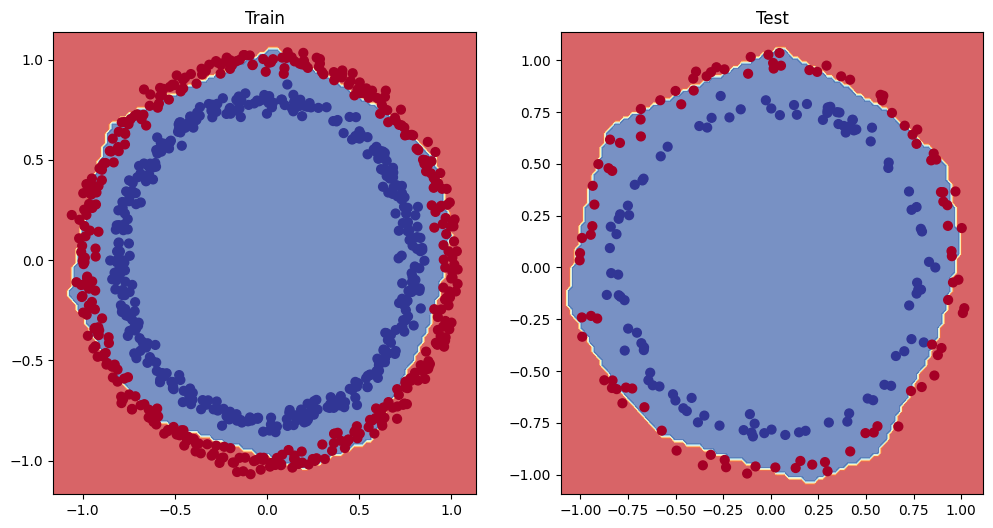

In [ ]:
# Plot Decision Boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) #rows, coulmn, index
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and pattern on it's own.

And theses tools are linear & non-linear functions.

In [ ]:
# Create tensor
A = torch.arange(-10, 10, 1, dtype = torch.float32).to(device)
A.dtype

torch.float32

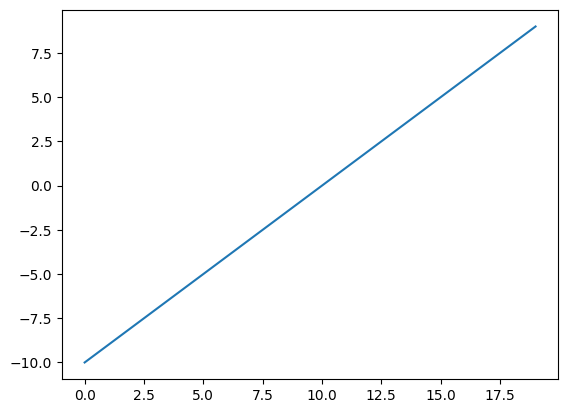

In [ ]:
# Visualize the tensor
plt.plot(A)

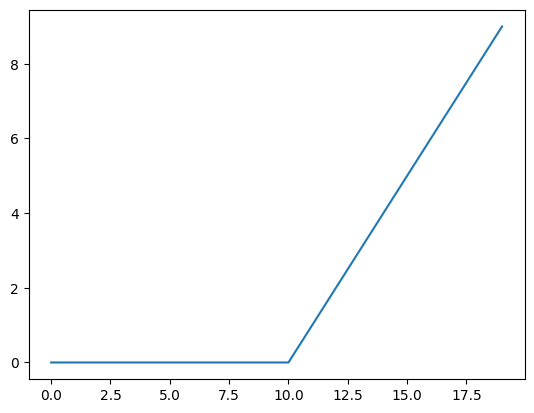

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch):
  return torch.maximum(torch.tensor(0),x)  # Input must be tensor

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

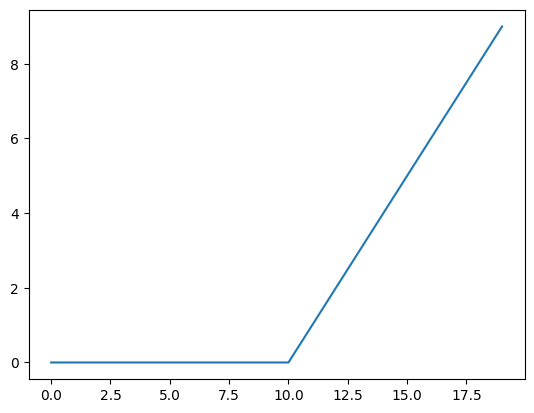

In [ ]:
# plot ReLU Activation function
plt.plot(relu(A))

In [ ]:
# Now let's do the same for sigmoid
def sigmoid(x):
  return 1/(1+torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

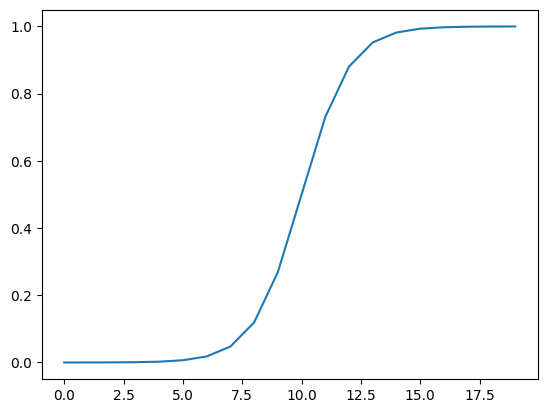

In [ ]:
# Using PyTorch
plt.plot(torch.sigmoid(A))

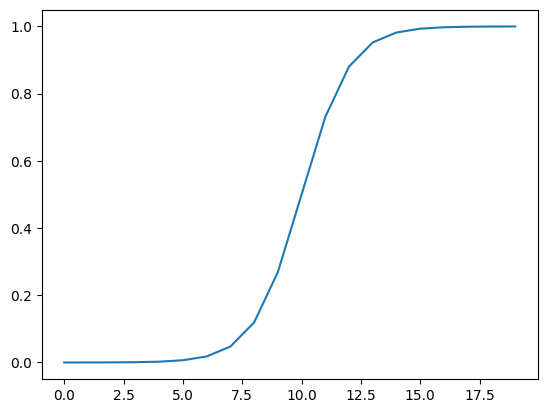

In [ ]:
# Let's Plot it
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another
* Multiclass Classification = Can be many thing

## 8.1 Creating a toy multi-class dataset

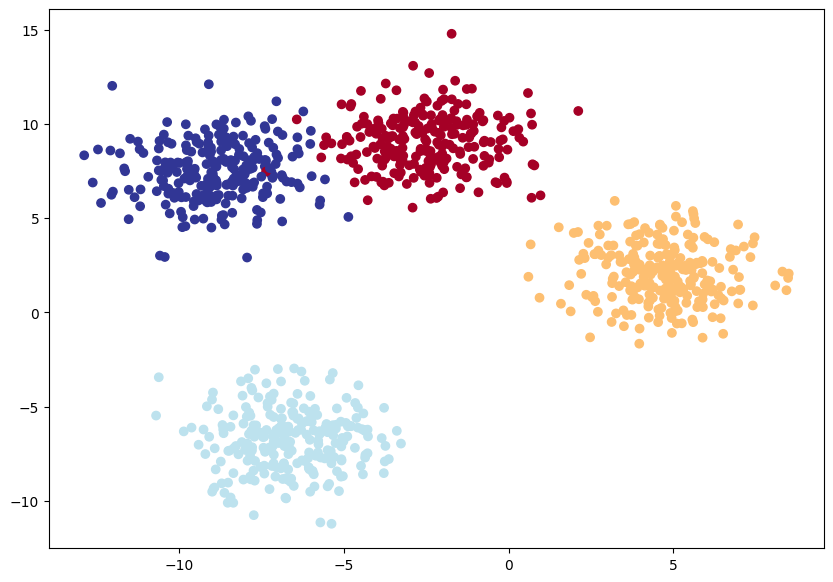

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5, # give the clusters a little shake up
                            random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

# 4. Plot data

plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

## 8.2 Building a multiclass classification model in PyTorch

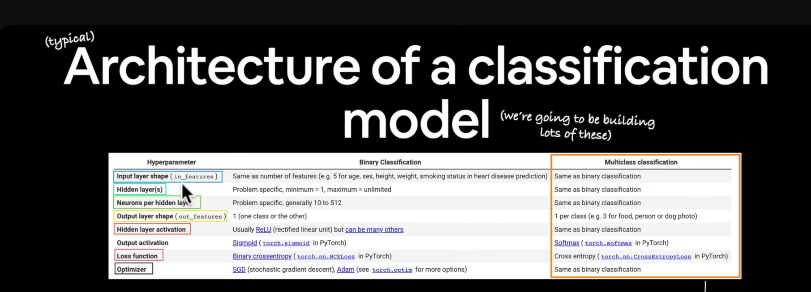

In [ ]:
# Create a device agnostice code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.Linear(in_features=hidden_units, out_features =hidden_units),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

multi_model = BlobModel(input_features = 2, output_features = 4, hidden_units = 8).to(device)
multi_model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# Loss function and an Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=multi_model.parameters(), lr=0.1)


## 8.4 Getting prediction probabilities for a multi-lass PyTorch model

In order to evaluate and train and test our model, we need to convert our model's output (logits) prediction probabilities and then to prediction labels.

Logits (raw outputs of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

In [ ]:
multi_model.eval()
with torch.inference_mode():
  y_logits = multi_model(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.3220,  0.1266, -0.2542, -0.1082],
        [-0.2599, -0.9802,  0.4396,  0.0592],
        [-0.3183, -0.4333,  1.0935,  0.7527],
        [-0.3293,  0.1369, -0.0188,  0.0786],
        [-0.2819, -0.4249, -0.2383, -0.2817],
        [-0.2490, -1.1520,  0.5021,  0.0500],
        [-0.3287, -0.2607,  1.0125,  0.7478],
        [-0.2772, -0.5608, -0.0483, -0.1795],
        [-0.3046, -0.6837,  1.2656,  0.8024],
        [-0.2796, -0.5039, -0.1105, -0.2087]])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:5])
print(y_logits[:5])


tensor([[0.2051, 0.3213, 0.2195, 0.2540],
        [0.2051, 0.0998, 0.4129, 0.2822],
        [0.1122, 0.1000, 0.4604, 0.3274],
        [0.1831, 0.2918, 0.2498, 0.2753],
        [0.2557, 0.2216, 0.2670, 0.2557]])
tensor([[-0.3220,  0.1266, -0.2542, -0.1082],
        [-0.2599, -0.9802,  0.4396,  0.0592],
        [-0.3183, -0.4333,  1.0935,  0.7527],
        [-0.3293,  0.1369, -0.0188,  0.0786],
        [-0.2819, -0.4249, -0.2383, -0.2817]])


In [ ]:
# Convert our model's prediction probablilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 2, 2, 1, 2, 2, 2, 2, 2, 2])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

## 8.5 Create a training and testing loop for multiclass classification

In [ ]:
y_blob_train[:10]

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0])

In [ ]:
y_logits[:10]

tensor([[-0.3220,  0.1266, -0.2542, -0.1082],
        [-0.2599, -0.9802,  0.4396,  0.0592],
        [-0.3183, -0.4333,  1.0935,  0.7527],
        [-0.3293,  0.1369, -0.0188,  0.0786],
        [-0.2819, -0.4249, -0.2383, -0.2817],
        [-0.2490, -1.1520,  0.5021,  0.0500],
        [-0.3287, -0.2607,  1.0125,  0.7478],
        [-0.2772, -0.5608, -0.0483, -0.1795],
        [-0.3046, -0.6837,  1.2656,  0.8024],
        [-0.2796, -0.5039, -0.1105, -0.2087]])

In [ ]:
#Random Seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Epoch
epochs = 100

# Send it to device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  ### Training
  multi_model.train()

  # 1. Forward pass
  y_logits = multi_model(X_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim=1)

  #2. Calculate the loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_blob_train, y_pred )

  # 3. Optimize
  optimizer.zero_grad()

  # 4. Backward Propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ##Testing
  multi_model.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_blob_logits = multi_model(X_blob_test)
    test_blob_preds = torch.softmax(test_blob_logits, dim=1).argmax(dim=1)
    #Calculate_loss
    test_loss = loss_fn(test_blob_logits, y_blob_test)
    test_acc = accuracy_fn(y_blob_test, test_blob_preds)

  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 1.1559, Accuracy: 48.38% | Test Loss: 0.8921, Test Accuracy: 70.50
Epoch: 10 | Loss: 0.1419, Accuracy: 99.00% | Test Loss: 0.1261, Test Accuracy: 99.50
Epoch: 20 | Loss: 0.0700, Accuracy: 99.00% | Test Loss: 0.0612, Test Accuracy: 99.50
Epoch: 30 | Loss: 0.0505, Accuracy: 99.12% | Test Loss: 0.0421, Test Accuracy: 99.50
Epoch: 40 | Loss: 0.0420, Accuracy: 99.12% | Test Loss: 0.0334, Test Accuracy: 99.50
Epoch: 50 | Loss: 0.0373, Accuracy: 99.12% | Test Loss: 0.0285, Test Accuracy: 99.50
Epoch: 60 | Loss: 0.0344, Accuracy: 99.12% | Test Loss: 0.0254, Test Accuracy: 99.50
Epoch: 70 | Loss: 0.0325, Accuracy: 99.12% | Test Loss: 0.0233, Test Accuracy: 99.50
Epoch: 80 | Loss: 0.0311, Accuracy: 99.12% | Test Loss: 0.0217, Test Accuracy: 99.50
Epoch: 90 | Loss: 0.0301, Accuracy: 99.12% | Test Loss: 0.0205, Test Accuracy: 99.50


## 8.6 Making and evaluating with a PyTorch multi-class model

In [ ]:
# Make Predictions
multi_model.eval()
with torch.inference_mode():
  y_logits = multi_model(X_blob_test)

y_logits[:10]

tensor([[  6.7187,  13.1573, -14.8802,  -9.0285],
        [  2.2134, -15.4788,   1.0266,   8.8693],
        [-10.3632, -16.9811,  21.2564,  12.2752],
        [  3.1689,   9.6254,  -8.2123,  -6.2225],
        [  9.3721,   4.0677, -16.2491,  -4.1638],
        [  2.1848, -19.2145,   2.2230,  11.0924],
        [-10.0643, -12.9434,  19.5422,   9.8188],
        [  7.2617,  -1.0949, -11.3410,  -0.6776],
        [-11.6079, -23.6982,  25.2830,  16.5110],
        [  7.8874,   0.7931, -12.9063,  -1.9233]])

In [ ]:
# Go from logits -> Predictions Probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[1.5961e-03, 9.9840e-01, 6.6495e-13, 2.3127e-10],
        [1.2843e-03, 2.6609e-11, 3.9193e-04, 9.9832e-01],
        [1.8524e-14, 2.4752e-17, 9.9987e-01, 1.2573e-04],
        [1.5679e-03, 9.9843e-01, 1.7885e-08, 1.3082e-07],
        [9.9505e-01, 4.9452e-03, 7.4253e-12, 1.3161e-06],
        [1.3531e-04, 6.8824e-14, 1.4058e-04, 9.9972e-01],
        [1.3868e-13, 7.7922e-15, 9.9994e-01, 5.9861e-05],
        [9.9941e-01, 2.3471e-04, 8.3315e-09, 3.5627e-04],
        [9.5155e-17, 5.3418e-22, 9.9985e-01, 1.5499e-04],
        [9.9912e-01, 8.2910e-04, 9.3110e-10, 5.4812e-05]])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# Go from pred probss to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

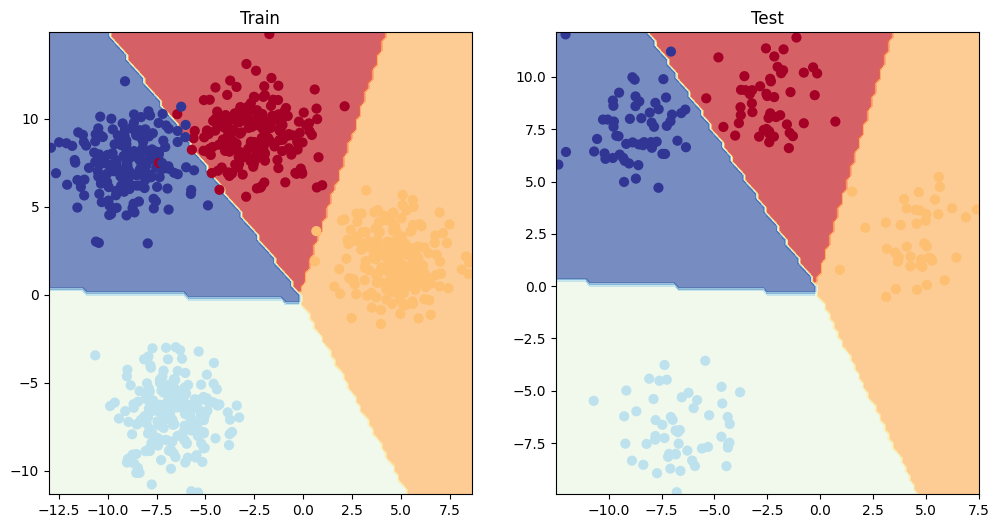

In [ ]:
# Plot the results
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(multi_model, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(multi_model, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 how many it got right

* Precision

* Recall

* Confusion Matrix

* Classification report

* F-1 Score

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate Accuracy
torchmetric_accuracy(y_preds, y_blob_test )

tensor(0.9950)